<a href="https://colab.research.google.com/github/metsumesquita/master_degree_UPE/blob/main/Hybrid_Model_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Escrever o artigo no overleaf ⁉[overleaf_artigo](https://pt.overleaf.com/9677853253txwnpcyrdcmg#ce7095)

In [ ]:
#Dataset que jáe estão certos
#-Exchange rate
#-The sunspot (o nosso vai ate 1988)
#the Canadian lynx


#dataset que foram usados

#Exchange rate: foi passada pelo próprio khashei (o autor do artigo que estás usando como base) para a gente.
# The exchange rate data set used in this paper contains weekly observations from 1980 to 1993
#https://github.com/metsumesquita/master_degree_UPE/blob/main/Datasets/US-UK.csv

#-The sunspot data considered in this paper include the annual number of sunspot from 1700 to 1987()

#the Canadian lynx annual record of the number of Canadian lynx from 1821 to 1934
#https://github.com/metsumesquita/master_degree_UPE/blob/main/Datasets/lynx.csv

#Falta ??

#nao sei se os dados entao todo certos
#The closing Nikkei 225 index (N225) data set covers daily stock prices from 2006/03/03 to 2010/04/01

#Unico artigo que falta
#- wind speed data in Colorado State are used for simulating series hybrid models.


"""
---
mas como a maioria desses dataset são amplamente usamos normalmente nao precisam de grande tratamento , colocaremos a normalização entre 1 e 0,
o janelamento pode receber um melhoramento escolhando a melhor lag
deve ser feita o salvamento de cada previsao que for feita e tambem de cada execução
deve ser feita uma comparação entre o modelo antes do algoritmo de melhorando para os parametros e depois da utilização de algoritmos geneticos

deve focar primeiramente na criaçao dos modelos por ser algo mais trabalhoso e demorado do que o resto do projeto

alem disso existem muitas formas de realizar a combinçao de modelos como por exemplo o modelo de ponderaçao
o modelo de funçao o modelo de combinaçao utilizando knn,e alem disso temos formas de selçao como a seleçao dinmaica (DYN), a do oraculo ou oracle
e tambem o do pior modelo

- importante criar omodelo primeiro
ARIMA–MLP
ARIMA-SVM
MLP–ARIMA
SVM-ARIMA


ao utilizamos as metricas MAE,MSE ou RMAE , deve ser explicado o uso / defender ele e dar algum tipo de base (ref de artigo paper)

tambem podemos utilizar o github dispobinizado pelo professor domingos


https://github.com/domingos108/hybrid_system_forecast/blob/master/additive_hybrid_model_mlp.ipynb
"""


'\n---\nmas como a maioria desses dataset são amplamente usamos normalmente nao precisam de grande tratamento , colocaremos a normalização entre 1 e 0,\no janelamento pode receber um melhoramento escolhando a melhor lag\ndeve ser feita o salvamento de cada previsao que for feita e tambem de cada execução\ndeve ser feita uma comparação entre o modelo antes do algoritmo de melhorando para os parametros e depois da utilização de algoritmos geneticos\n\ndeve focar primeiramente na criaçao dos modelos por ser algo mais trabalhoso e demorado do que o resto do projeto\n\nalem disso existem muitas formas de realizar a combinçao de modelos como por exemplo o modelo de ponderaçao\no modelo de funçao o modelo de combinaçao utilizando knn,e alem disso temos formas de selçao como a seleçao dinmaica (DYN), a do oraculo ou oracle\ne tambem o do pior modelo\n\n- importante criar omodelo primeiro\nARIMA–MLP\nARIMA-SVM\nMLP–ARIMA\nSVM-ARIMA\n\n\nao utilizamos as metricas MAE,MSE ou RMAE , deve ser expli

In [ ]:
"""
combinador treinavel
rede neural pode der aplicado
svm
recregssao linear
meta learning
stackling

#https://www.sciencedirect.com/science/article/abs/pii/S0925231211004504

comparação com outros assemplys
otimização de sistemas hibridos utilizando pso ou algoritmos geneticos
https://robjhyndman.com/papers/fforms.pdf

precisa fazer o assembly ?
combiniing pattern classifirrer methdos e algorithm
giorgio ciacinto

conferencia PAMI

#https://eprints.bournemouth.ac.uk/11186/1/Neurocomputing_Lemke_Gabrys_2009_accepted.pdf


"""

'\ncombinador treinavel\nrede neural pode der aplicado\nsvm\nrecregssao linear\nmeta learning\nstackling\n\n#https://www.sciencedirect.com/science/article/abs/pii/S0925231211004504\n\ncomparação com outros assemplys\notimização de sistemas hibridos utilizando pso ou algoritmos geneticos\nhttps://robjhyndman.com/papers/fforms.pdf\n\nprecisa fazer o assembly ?\ncombiniing pattern classifirrer methdos e algorithm\ngiorgio ciacinto\n\nconferencia PAMI\n\n#https://eprints.bournemouth.ac.uk/11186/1/Neurocomputing_Lemke_Gabrys_2009_accepted.pdf\n\n\n'

#instalações e importações

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras as ks
import tensorflow as tf


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:

from pandas.plotting import autocorrelation_plot
from sklearn.linear_model import LinearRegression

from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

#carregamento dos conjuntos

In [ ]:
url_1 = "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/sunspot.csv"
sunpot_data = pd.read_csv(url_1)

url_2= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE//main/Datasets/US-UK.csv"
exchange_data= pd.read_csv(url_2)

url_3= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/lynx.csv"
lynx_data= pd.read_csv(url_3)

url_4= "https://raw.githubusercontent.com/metsumesquita/master_degree_UPE/main/Datasets/nikkei225.csv"
nikkei225_data= pd.read_csv(url_4)

#lynx
####the Canadian lynx annual record of the number of Canadian lynx from 1821 to 1934

In [ ]:
#lynx
lynx_data.head()

,year,value
0,1821,269
1,1822,321
2,1823,585
3,1824,871
4,1825,1475


In [ ]:
lynx_data.tail()

,year,value
109,1930,662
110,1931,1000
111,1932,1590
112,1933,2657
113,1934,3396


In [ ]:
lynx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    114 non-null    int64
 1   value   114 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [ ]:
print(lynx_data.index)
print(type(lynx_data.index))

RangeIndex(start=0, stop=114, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [ ]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
lynx_data["year"] = pd.to_datetime(lynx_data["year"], format="%Y")

# Definir 'year' como índice
lynx_data.set_index("year", inplace=True)

# Se o índice for do tipo PeriodIndex, converta para Timestamp
if isinstance(lynx_data.index, pd.PeriodIndex):
    lynx_data.index = lynx_data.index.to_timestamp()


In [ ]:

# Ordenar os dados por data (boa prática)
lynx_data=lynx_data.sort_index()

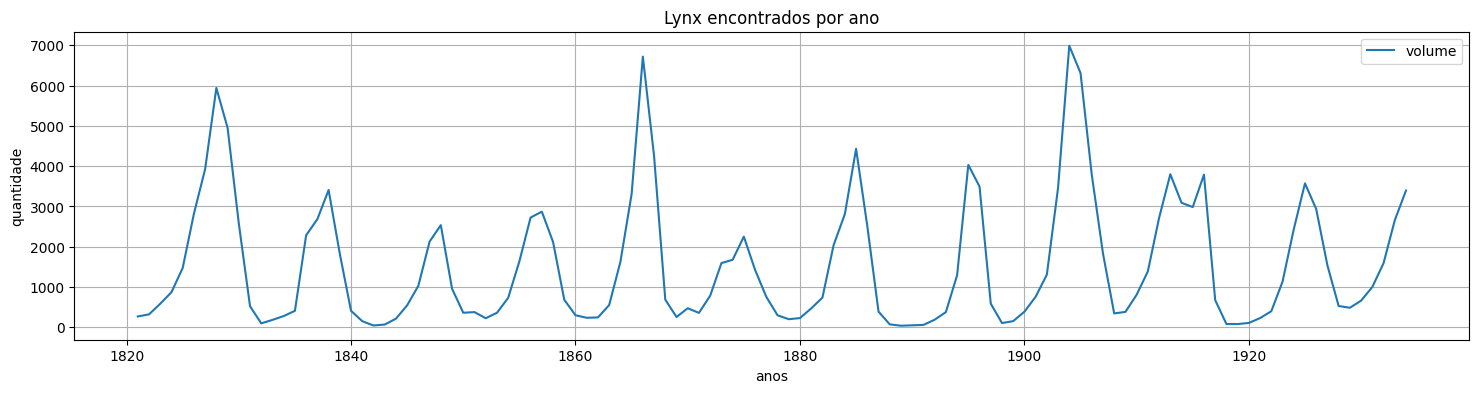

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(lynx_data.index, lynx_data["value"], label='volume')
plt.title("Lynx encontrados por ano")
plt.xlabel("anos")
plt.ylabel("quantidade")
plt.grid(True)
plt.legend()
plt.show()


#sunpot
####The sunspot data considered in this paper include the annual number ofsunspot from 1700 to 1987

In [ ]:
#sunpot
print("primeiros anos registrados")
sunpot_data.head()

primeiros anos registrados


,year,value
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0


In [ ]:
print("ultimos anos registrados")
sunpot_data.tail()

ultimos anos registrados


,year,value
284,1984,45.9
285,1985,17.9
286,1986,13.4
287,1987,29.2
288,1988,100.2


In [ ]:
sunpot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    289 non-null    int64  
 1   value   289 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.6 KB


In [ ]:
print(sunpot_data.index)
print(type(sunpot_data.index))

RangeIndex(start=0, stop=289, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [ ]:
# Converter a coluna 'year' para datetime no formato de ano
sunpot_data["year"] = pd.to_datetime(sunpot_data["year"], format="%Y", errors='coerce')

# Definir 'year' como índice
sunpot_data.set_index("year", inplace=True)

# Garantir que o índice seja datetime (Timestamp), não Period
if isinstance(sunpot_data.index, pd.PeriodIndex):
    sunpot_data.index = sunpot_data.index.to_timestamp()

# Ordenar os dados por data (boa prática)
sunpot_data = sunpot_data.sort_index()


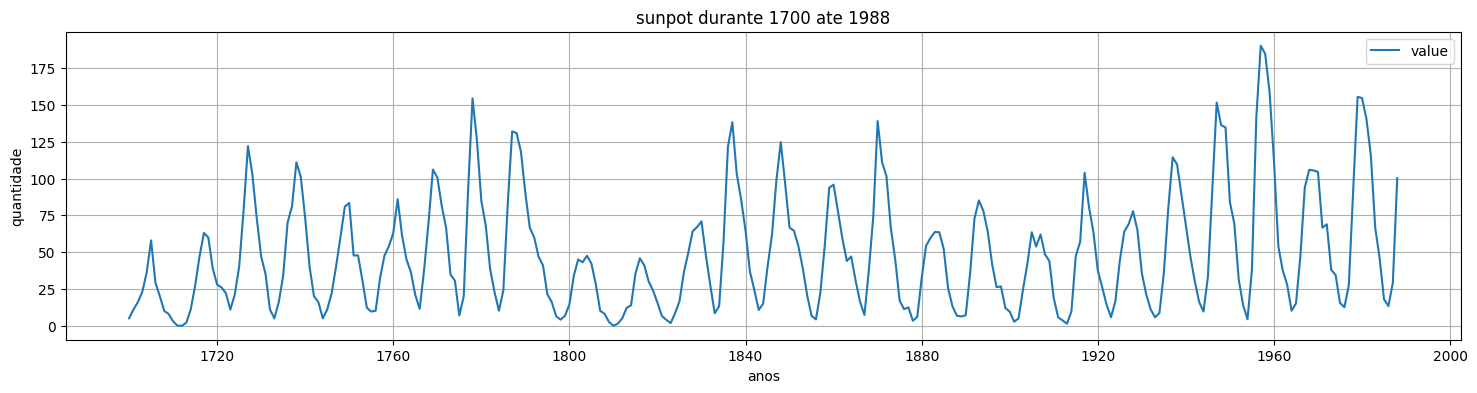

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(sunpot_data.index,sunpot_data["value"], label='value')
plt.title("sunpot durante 1700 ate 1988")
plt.xlabel("anos")
plt.ylabel("quantidade")
plt.grid(True)
plt.legend()
plt.show()


#exchange rate
####The exchange rate data set used in this paper contains weekly observations from 1980 to 1993

In [ ]:
#exchange
exchange_data.head()
exchange_data.tail()

,observation_date,DEXUSUK
725,1993-11-27,1.4795
726,1993-12-04,1.4900
727,1993-12-11,1.4945
728,1993-12-18,1.4910
729,1993-12-25,1.5030


In [ ]:
exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  730 non-null    object 
 1   DEXUSUK           730 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.5+ KB


In [ ]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
#weekly observations from 1980 to 1993
exchange_data["observation_date"] = pd.to_datetime(exchange_data["observation_date"])
exchange_data.set_index("observation_date", inplace=True)

# Caso seja PeriodIndex (pouco comum nesse tipo de dado), converter:
if isinstance(exchange_data.index, pd.PeriodIndex):
    exchange_data.index = exchange_data.index.to_timestamp()


# Ordenar os dados por data (boa prática)
exchange_data = exchange_data.sort_index()


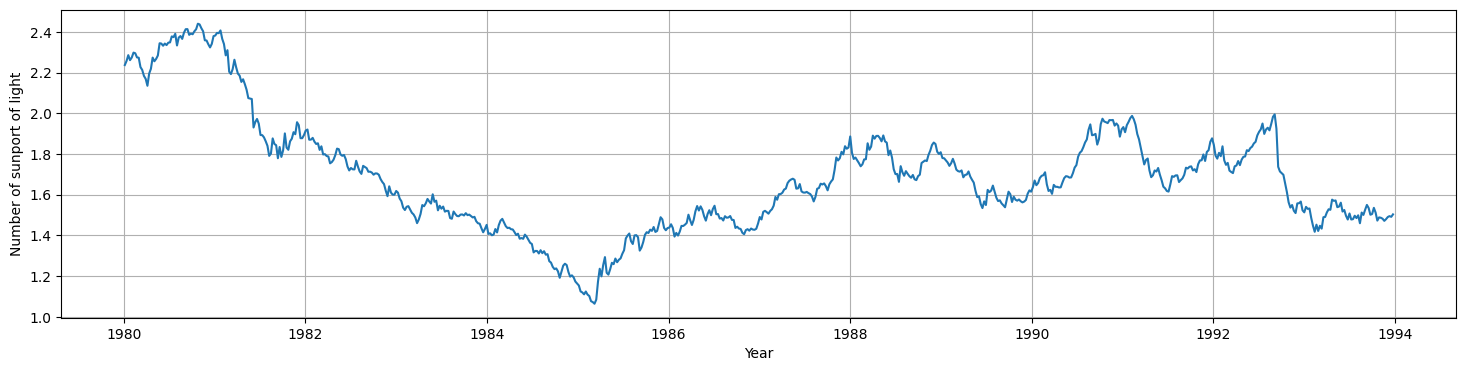

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(exchange_data.index,exchange_data["DEXUSUK"], label='DEXUSUK')
plt.plot(title="DEXUSUK observações semanais do ano de 1980 ate 1993 ")
plt.xlabel("Year")
plt.ylabel("Number of sunport of light")
plt.grid(True)
plt.show()

#nikkie225
>
The closing Nikkei 225 index (N225) data set covers daily stock
prices from 2006/03/03 to 2010/04/01

In [ ]:
nikkei225_data.head()

,date,value
0,2006-03-03,15663.339844
1,2006-03-06,15901.160156
2,2006-03-07,15726.019531
3,2006-03-08,15627.490234
4,2006-03-09,16036.910156


In [ ]:
nikkei225_data.tail()

,date,value
995,2010-03-26,10996.370117
996,2010-03-29,10986.469727
997,2010-03-30,11097.139648
998,2010-03-31,11089.940430
999,2010-04-01,11244.400391


In [ ]:
nikkei225_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1000 non-null   object 
 1   value   1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# Corrigir para 'to_datetime' e passar a coluna corretamente
#2006/03/03 to 2009/06/05
nikkei225_data["date"] = pd.to_datetime(nikkei225_data["date"])
nikkei225_data.set_index("date", inplace=True)

# Caso seja PeriodIndex (pouco comum nesse tipo de dado), converter:
if isinstance(nikkei225_data.index, pd.PeriodIndex):
    nikkei225_data.index = nikkei225_data.index.to_timestamp()

# Ordenar os dados por data (boa prática)
nikkei225_data =nikkei225_data.sort_index()

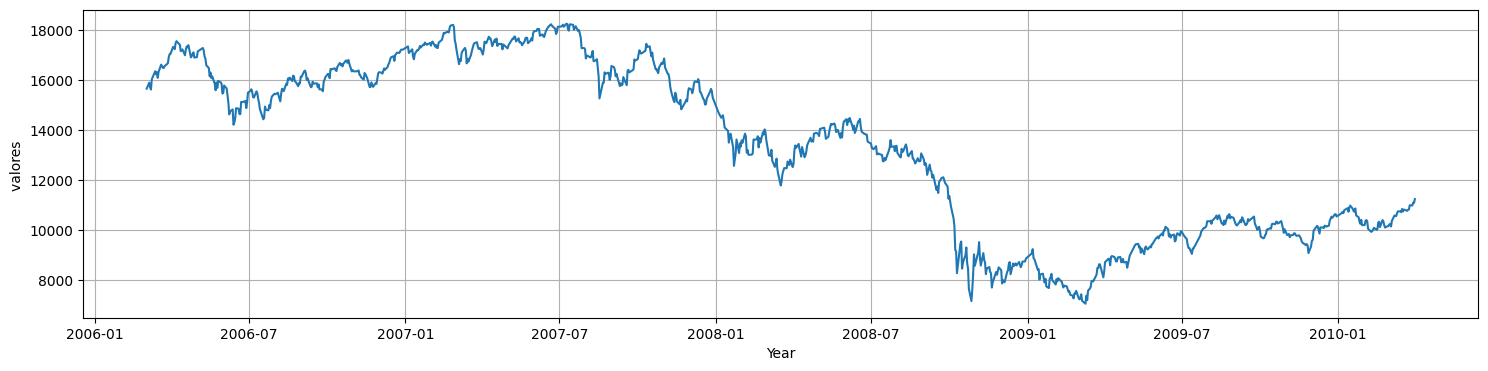

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(nikkei225_data.index,nikkei225_data["value"], label='valores')
plt.plot(title="nikkie 225 ,bolsa de valores 2006/03/03 ate 2010/04/01")
plt.xlabel("Year")
plt.ylabel("valores ")
plt.grid(True)
plt.show()

#estacionalidade para todo os conjuntos


In [ ]:
from statsmodels.tsa.stattools import adfuller

def testar_estacionaridade_univariada(dataframes, nomes=None, max_diff=3):
    for i, df in enumerate(dataframes):
        nome = nomes[i] if nomes else f"Série {i+1}"
        col = df.columns[0]
        serie = df[col].dropna()

        print(f"\n📊 Análise de Estacionaridade - {nome}")
        print(f"Coluna analisada: {col}")

        # ADF na série original
        adf_result = adfuller(serie)
        print(f"\n🔍 Série Original:")
        print(f"  ADF Statistic: {adf_result[0]:.4f}")
        print(f"  p-value: {adf_result[1]:.4f}")

        if adf_result[1] < 0.05:
            print("  ✅ A série é estacionária. Não será diferenciada.")
            continue  # Não precisa diferenciar
        else:
            print("  ❌ A série NÃO é estacionária. Tentando diferenciações...")

        # Diferenciação sucessiva
        d = 1
        serie_diff = serie.diff().dropna()
        while d <= max_diff:
            adf_diff = adfuller(serie_diff)
            print(f"\n🔁 Série Diferenciada ({d}ª ordem):")
            print(f"  ADF Statistic: {adf_diff[0]:.4f}")
            print(f"  p-value: {adf_diff[1]:.4f}")
            if adf_diff[1] < 0.05:
                print(f"  ✅ A série diferenciada ({d}) é estacionária.")
                break
            else:
                print(f"  ❌ A série diferenciada ({d}) ainda NÃO é estacionária.")
                serie_diff = serie_diff.diff().dropna()
                d += 1

        if d > max_diff:
            print(f"⚠️ A série não se tornou estacionária após {max_diff} diferenciações.")




In [ ]:
list_data = [exchange_data, sunpot_data, lynx_data,nikkei225_data]
nomes_series = ["Exchange Rate", "Sunspot", "Lynx Trappings","nikkie"]

testar_estacionaridade_univariada(list_data,nomes_series)



📊 Análise de Estacionaridade - Exchange Rate
Coluna analisada: observation_date


ValueError: could not convert string to float: '1980-01-05'

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def gerar_graficos_temporais(df, titulo):
    col = df.columns[0]
    serie = df[col]

#para os conjuntos nikkie e exchange
    # Reamostragem mensal (se fizer sentido para a série)
    if df.index.inferred_freq not in ['M', 'MS']:
        serie_mensal = serie.resample('M').mean()
    else:
        serie_mensal = serie

    cleaned_series = serie.dropna()

    plt.figure(figsize=(15, 18))

#para o conjunto sunpot e lynx que sao dados anuais talvez seja melhor feito por semestre ?




    # 1. Série original
    plt.subplot(4, 1, 1)
    plt.plot(serie, color='blue')
    plt.title(f'{titulo} - Série Original')
    plt.xlabel('Data')
    plt.ylabel(col)
    plt.grid(True)

    # 2. Média mensal
    plt.subplot(4, 1, 2)
    plt.plot(serie_mensal, color='green')
    plt.title(f'{titulo} - Média Mensal')
    plt.xlabel('Data')
    plt.ylabel(col)
    plt.grid(True)

    # 3. ACF
    plt.subplot(4, 1, 3)
    plot_acf(cleaned_series, lags=20, ax=plt.gca())
    plt.title(f'{titulo} - Autocorrelação (ACF)')
    plt.grid(True)

    # 4. PACF
    plt.subplot(4, 1, 4)
    plot_pacf(cleaned_series, lags=20, ax=plt.gca(), method='ywm')
    plt.title(f'{titulo} - Autocorrelação Parcial (PACF)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
for df, nome in zip(list_data, nomes_series):
    gerar_graficos_temporais(df, nome)

#treinamento

In [ ]:
##treinamento
train_sunpot_data = sunpot_data.loc['1700':'1920']
train_lynx_data = lynx_data.loc['1821':'1920']
train_exchangerate_data=exchange_data.loc['1980':'1992'] #weekly
train_nikkie225_data=nikkei225_data.loc['2006/03/03':'2009/06/05']

test_lynx_data = lynx_data.loc['1921':'1934']
test_sunpot_data = sunpot_data.loc['1921':'1987']
test_exchangerate_data=exchange_data.loc['1993']
test_nikkie225_data=nikkei225_data.loc['2009/06/06':'2010/04/01']

#normalização

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalizar_serie_unica_coluna(train, test):

    scaler = MinMaxScaler()
    scaler.fit(train[[train]])  # Fit só no treino

    train_normalized = train.copy()
    test_normalized = test.copy()

    train_normalized[col] = scaler.transform(train)
    test_normalized[col] = scaler.transform(test)

    return train_normalized, test_normalized, scaler



In [ ]:
train_lynx_norm, test_lynx_norm, scaler_lynx = normalizar_serie_unica_coluna(train_lynx_data, test_lynx_data)

train_sunspot_norm, test_sunspot_norm, scaler_sunspot = normalizar_serie_unica_coluna(train_sunpot_data, test_sunpot_data)

train_exchange_norm, test_exchange_norm, scaler_exchange = normalizar_serie_unica_coluna(train_exchangerate_data, test_exchangerate_data)

train_nikkei_norm, test_nikkei_norm, scaler_nikkei = normalizar_serie_unica_coluna(train_nikkie225_data, test_nikkie225_data)


#decomposição

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Iterar por cada coluna do DataFrame
for coluna in df.columns:
    print(f"Analisando sazonalidade para a coluna: {coluna}")
    serie_temporal = df[coluna]

    # Realizar decomposição sazonal (ajuste o período, ex.: 12 para dados mensais)
    decomposicao = seasonal_decompose(serie_temporal, model='additive', period=12)

    # Plotar os componentes
    decomposicao.plot()
    plt.suptitle(f"Decomposição Sazonal - {coluna}", y=1.02)
    plt.show()

#janelamento

#arima model
>

A diferenciação (d no ARIMA) é o principal método para alcançar a estacionariedade quando há tendências ou sazonalidade estocástica. O teste de Dickey-Fuller Aumentado (ADF) é uma forma formal de verificar a necessidade de diferenciação (testa a presença de raiz unitária)

>  

as funções de autocorrelação (ACF) e autocorrelação parcial (PACF) são as ferramentas primárias para identificar as ordens (p, q, P, Q) de modelos ARMA/SARIMA após a série ser tornada estacionária




In [ ]:
def ajustar_ar(serie, p):
    """
    Ajusta um modelo AR(p) usando mínimos quadrados.
    """
    Y = serie[p:].values  # target
    X = np.column_stack([serie.shift(i).dropna().values[-len(Y):] for i in range(1, p+1)])

    # Adiciona intercepto (bias)
    X = np.column_stack([np.ones(len(Y)), X])

    # Estimativa por mínimos quadrados: φ = (XᵀX)⁻¹XᵀY
    coeficientes = np.linalg.inv(X.T @ X) @ X.T @ Y
    return coeficientes


In [ ]:
p = 2
phi = ajustar_ar(serie_diff, p)
print("Coeficientes AR:", phi)


In [ ]:
def prever_ar(serie, coeficientes, p):
    """
    Gera previsões com o modelo AR(p).
    """
    previsoes = []
    serie_vals = list(serie[-p:].values)

    for _ in range(10):  # exemplo: prever 10 passos à frente
        x = [1] + serie_vals[-p:]  # 1 para o bias
        pred = np.dot(coeficientes, x)
        previsoes.append(pred)
        serie_vals.append(pred)
    return previsoes


In [ ]:
last_real = exchange_data['DEXUSUK'].dropna().iloc[-1]  # último valor antes da previsão
previsoes_final = np.cumsum(prever_ar(serie_diff, phi, p)) + last_real


In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(exchange_data.index[-50:], exchange_data['DEXUSUK'].iloc[-50:], label="Histórico real")
plt.plot(pd.date_range(exchange_data.index[-1], periods=10, freq='W'), previsoes_final, label="Previsão", color='orange')
plt.legend()
plt.title("Previsão Manual ARIMA(p,d,q)")
plt.grid(True)
plt.show()


#o que deve ser feito de acordo com o que esta escrito no artigo selecionado

In [ ]:
#o que deve ser feito
"""
explicar como realizar o projeto descrito no artigo "Sequence in Hybridization of Statistical and Intelligent Models in Time Series Forecasting". O objetivo principal do projeto é comparar a performance de modelos híbridos de séries temporais, especificamente as abordagens sequenciais **Linear–Não Linear** e **Não Linear–Linear**, utilizando modelos estatísticos (ARIMA) e inteligentes (MLP/SVM).

O projeto envolve a implementação e avaliação de duas sequências principais de modelagem:

**1. Sequência Linear–Não Linear (Exemplo: ARIMA-MLP)**

Esta abordagem começa modelando a parte linear da série temporal e depois modela a parte não linear restante nos resíduos.

*   **Passo 1: Modelagem Linear (ARIMA) nos Dados Originais**
    *   **Entrada:** A série temporal original ("row data").
    *   **Objetivo:** Capturar e modelar os padrões lineares na série.
    *   **Processo:** Aplique o ciclo padrão de modelagem ARIMA:
        *   **Identificação:** Determine as ordens (p, d, q) do modelo ARIMA. Isso geralmente envolve primeiro tornar a série estacionária, tipicamente por **diferenciação** (`d` vezes). Ferramentas como o software ITSM podem ajudar na análise visual da série e na aplicação de transformações ou diferenciações. Use as funções de autocorrelação (ACF) e autocorrelação parcial (PACF) da série (diferenciada, se necessário) para sugerir os valores apropriados de p e q. O ITSM pode plotar ACF/PACF.
        *   **Estimação:** Estime os parâmetros (φ, θ, σ²) do modelo ARIMA(p, d, q) escolhido. A estimação por Máxima Verossimilhança (Maximum Likelihood Estimation - MLE) é um método comum. ITSM oferece opções para estimação preliminar (como Yule-Walker, Burg) e MLE, incluindo uma função Autofit que busca o modelo com menor critério AICC.
        *   **Verificação Diagnóstica:** Avalie a adequação do modelo ARIMA ajustado, principalmente analisando seus resíduos. Os resíduos devem se assemelhar a um ruído branco (série sem autocorrelação significativa). Embora o objetivo seja usar esses resíduos no próximo passo, verificar se o modelo linear é adequado ajuda a garantir que ele capturou a estrutura linear esperada.
    *   **Saída:** Um modelo ARIMA ajustado e a série de resíduos gerada por este modelo (`êARIMA,t`). Estes resíduos são considerados como contendo os padrões não lineares.

*   **Passo 2: Modelagem Não Linear (Exemplo: MLP) nos Resíduos do ARIMA**
    *   **Entrada:** Os resíduos (`êARIMA,t`) do modelo ARIMA ajustado no Passo 1.
    *   **Objetivo:** Modelar os padrões não lineares ou as relações remanescentes que o modelo ARIMA não conseguiu explicar.
    *   **Processo:** Ajuste um modelo não linear, como uma Rede Neural Artificial do tipo Multilayer Perceptron (MLP) ou uma Support Vector Machine (SVM), aos resíduos do ARIMA. No caso da MLP, os resíduos ARIMA servem como dados de entrada para o treinamento. A estrutura da MLP (número de camadas, neurônios, lags de entrada) deve ser determinada, frequentemente por um processo de otimização, testando diferentes topologias e escolhendo aquela que minimiza o erro (e.g., MSE) em dados de teste.
    *   **Saída:** Um modelo não linear treinado capaz de prever ou modelar os resíduos do ARIMA (`ĉ2`).

*   **Passo 3: Previsão Combinada**
    *   A previsão final (`f̂combined,t`) é obtida **somando a previsão do modelo ARIMA** (feita para a série original usando o modelo ajustado no Passo 1, referida como `ĉ1` na notação do artigo) **e a previsão do modelo não linear** (feita para os resíduos do ARIMA usando o modelo ajustado no Passo 2, referida como `ĉ2` na notação do artigo). Ou seja, `f̂combined,t = ĉ1 + ĉ2`.

**2. Sequência Não Linear–Linear (Exemplo: MLP-ARIMA)**

Esta abordagem inverte a ordem, primeiro modelando a parte não linear e depois a parte linear nos resíduos.

*   **Passo 1: Modelagem Não Linear (Exemplo: MLP) nos Dados Originais**
    *   **Entrada:** A série temporal original ("row data").
    *   **Objetivo:** Capturar e modelar os padrões não lineares na série primeiro.
    *   **Processo:** Ajuste um modelo não linear (MLP ou SVM) diretamente nos dados originais. Determine a estrutura ideal do modelo não linear.
    *   **Saída:** Um modelo não linear treinado e a série de resíduos gerada por este modelo (`êMLP,t`).

*   **Passo 2: Modelagem Linear (ARIMA) nos Resíduos do Modelo Não Linear**
    *   **Entrada:** Os resíduos (`êMLP,t`) do modelo não linear ajustado no Passo 1. Estes resíduos são considerados como contendo os padrões lineares não capturados pelo modelo não linear.
    *   **Objetivo:** Modelar os padrões lineares ou as relações remanescentes nos resíduos.
    *   **Processo:** Aplique o ciclo padrão de modelagem ARIMA (Identificação, Estimação, Verificação Diagnóstica) aos resíduos do modelo não linear (`êMLP,t`). Isso inclui a diferenciação dos resíduos, se necessário, para atingir a estacionariedade antes de identificar e estimar o modelo ARMA para os resíduos.
    *   **Saída:** Um modelo ARIMA ajustado para os resíduos do modelo não linear.

*   **Passo 3: Previsão Combinada**
    *   A previsão final é obtida **somando a previsão do modelo não linear** (feita para a série original usando o modelo ajustado no Passo 1, referida como `ĉ2` nesta sequência) **e a previsão do modelo ARIMA** (feita para os resíduos do modelo não linear usando o modelo ajustado no Passo 2, referida como `ĉ1` nesta sequência). A fórmula combinada é `f̂combined,t = ĉ1 + ĉ2`.

**Avaliação e Comparação**

Após implementar ambas as sequências e obter as previsões combinadas para um conjunto de dados de teste, compare a performance usando métricas de erro como MSE, MAE e MAPE, bem como a correlação entre valores reais e previstos. O artigo sugere que a sequência Não Linear–Linear (MLP-ARIMA ou SVM-ARIMA) tende a produzir resultados mais precisos.

Em suma, o projeto envolve a aplicação sequencial de um modelo linear e um modelo não linear, em duas ordens diferentes, usando os resíduos da primeira etapa como entrada para a segunda. A implementação de cada modelo (ARIMA, MLP, SVM) segue os procedimentos padrão (como identificação, estimação e verificação para ARIMA), adaptados para a entrada específica (dados originais ou resíduos) em cada passo da sequência híbrida.
"""

#referencia

In [ ]:
#https://github.com/liannewriting/YouTube-videos-public/tree/main/arima-model-time-series-prediction-python
#https://www.youtube.com/watch?v=Rl_tMSc_wKo
#https://medium.com/data-science/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6
#https://towardsdatascience.com/understanding-arima-time-series-modeling-d99cd11be3f8/
#https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd
#https://medium.com/@mouse3mic3/estimating-arima-and-sarima-coefficients-using-genetic-algorithm-03f24ab66589
#https://www.kaggle.com/discussions/questions-and-answers/199346
#https://www.datacamp.com/tutorial/arima
#https://arxiv.org/pdf/2504.08940
#https://www.kaggle.com/code/chanakyavivekkapoor/decomposing-time-series-data
#https://medium.com/analytics-vidhya/arima-model-from-scratch-in-python-489e961603ce